# 📊 Sentiment Analysis of Amazon Software Product Reviews

---

### 📝 **Introduction**<a id="section-one"></a>

With the massive amount of software products available on Amazon, customer reviews provide an essential look into how users feel about these products. This project aims to analyze Amazon reviews specifically for software products, classifying them into **positive**, **neutral**, or **negative** sentiments. By leveraging machine learning, we hope to uncover user satisfaction trends and identify key factors that impact user opinions on various software products.

To achieve this, we preprocess each review, including:
- **Tokenization**: Breaking down text into smaller parts
- **nGram Analysis**: most frequent 1 word(monogram), 2 words(Bigrams) and 3 word(Trigram) analysis
- **Lemmatization**: Converting words to their base forms
-**Stemming**: Deriving root word from inlficted word.
- **Stop Word Removal**: Filtering out common, unimportant words

After cleaning the data, we experiment with a range of machine learning models, such as **Naïve Bayes**, **Support Vector Machines (SVM)**, and many more to find the most effective approach for sentiment classification.

---

### 🎯 **Objectives**

1. **Data Collection**: Use a dataset of Amazon software product reviews to gather diverse feedback from software users.
2. **Data Preprocessing**: Clean and transform the data to prepare it for analysis.
3. **Sentiment Classification**: Test and compare multiple machine learning models to classify reviews as positive, neutral, or negative.
4. **Evaluation**: Measure the performance of each model to identify the best approach for analyzing sentiment in software reviews.

---

### 💡 **Applications**

The insights gained from this analysis can assist:
- **Software Developers**: Improve product features based on user feedback.
- **Customer Support Teams**: Understand common issues users face.
- **Marketers**: Tailor messaging to align with user preferences and expectations.

---

### 🛠️ **Technologies Used**

- **Python** (NLTK, Sklearn, etc)
- **Machine Learning** (Naïve Bayes, SVC,LR(Logistic Regression), DT(Decision Tree), KNN )
- **Amazon Dataset** (Software product reviews)

---


By using this analysis, we aim to bridge the gap between user experience and product development, helping software companies understand their users better and create products that meet their needs.





---

### 📁 **Dataset Information**<a id="section-one"></a>

This project uses the **Amazon Software Product Reviews** dataset, sourced from [Amazon Product Data](https://nijianmo.github.io/amazon/index.html). This repository contains reviews across various amazon product categories, providing detailed insights into customer opinions.

**citation:** 
"Justifying recommendations using distantly-labeled reviews and fined-grained aspects - Jianmo Ni, Jiacheng Li, Julian McAuley

<i>Empirical Methods in Natural Language Processing (EMNLP), 2019</i>"

#### 📊 **Some of the Categories are**

The above data repository includes reviews from multiple categories, such as:
- **Amazon Fashion**: 5-core (3,176 reviews) 
- **All Beauty**: 5-core (5,269 reviews) 
- **Appliances**: 5-core (2,277 reviews) 
- **Arts, Crafts and Sewing**: 5-core (494,485 reviews) 
- **Automotive**: 5-core (1,711,519 reviews) 
- **Books**, **Home & Kitchen**, **Electronics**, and more.

#### 📐 **Dataset Size Options**

The Amazon dataset is available in two versions:
- **Large Datasets**: Contains huge number of reviews(in Millions) for a category, suitable for extensive analysis.
- **Small Datasets**: A 5-core subset, containing only few thousands of reviews for specific product category, making it more manageable for focused studies.

For this project, we selected the **smaller 5-core dataset** for the **Software** category, which includes **12,805 reviews**.

#### 🔍 **Dataset Features**

Each review in the dataset contains the following fields:
- **reviewerID**: Unique ID of the reviewer, e.g., `A2SUAM1J3GNN3B`
- **asin**: Product ID, e.g., `0000013714`
- **reviewerName**: Name of the reviewer
- **vote**: Count of helpful votes received by the review
- **style**: Dictionary with metadata about the product (e.g., `"Format": "Hardcover"`)
- **reviewText**: The main text of the review
- **overall**: Numeric rating of the product
- **summary**: Brief summary of the review
- **unixReviewTime**: Review time in Unix format
- **reviewTime**: Raw date of the review
- **image**: Images posted by users with the review
- **Metadata**: Additional information about the product (not included in all reviews)

> **Note**: The dataset is provided in **JSON format** instead of CSV, which requires specific handling for data extraction and analysis.

---

This structured and diverse dataset provides a rich foundation for analyzing customer sentiment in the software product category, offering valuable insights for understanding user experiences and preferences.



## Import Libraries
**Let's import all necessary libraries for the analysis and along with it let's bring down our dataset**

In [1]:
import gzip
import json
import pandas as pd
import numpy as np

#NLTK libraries
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning libraries
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing 

#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# #Other miscellaneous libraries
import cufflinks as cf                    # pip install cufflinks
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE  # pip install imblearn

## Importing the dataset
**Let's welcome our dataset and see what's inside the box. We extract the data first from zip using gzip library and then parse the data from json into a dataframe**

In [2]:
def parse(path):                    
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

raw_reviews = getDF('Software_5.json.gz')

## print shape of dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(raw_reviews.shape))
print (raw_reviews.info())

The shape of the  data is (row, column):(12805, 12)
<class 'pandas.core.frame.DataFrame'>
Index: 12805 entries, 0 to 12804
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         12805 non-null  float64
 1   verified        12805 non-null  bool   
 2   reviewTime      12805 non-null  object 
 3   reviewerID      12805 non-null  object 
 4   asin            12805 non-null  object 
 5   style           7161 non-null   object 
 6   reviewerName    12796 non-null  object 
 7   reviewText      12804 non-null  object 
 8   summary         12799 non-null  object 
 9   unixReviewTime  12805 non-null  int64  
 10  vote            3902 non-null   object 
 11  image           71 non-null     object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 1.2+ MB
None


In [3]:
raw_reviews.head()

overall  verified   reviewTime      reviewerID        asin  \
0      4.0     False  10 20, 2010  A38NELQT98S4H8  0321719816   
1      4.0     False  10 18, 2010  A3QJU4FEN8PQSZ  0321719816   
2      5.0     False  10 16, 2010   ACJT8MUC0LRF0  0321719816   
3      5.0     False  10 12, 2010   AYUF7YETYOLNX  0321719816   
4      5.0     False   10 7, 2010  A31ICLWQ9CSHRS  0321719816   

                     style  reviewerName  \
0  {'Format:': ' DVD-ROM'}     WB Halper   
1  {'Format:': ' DVD-ROM'}        Grimmy   
2  {'Format:': ' DVD-ROM'}     D. Fowler   
3  {'Format:': ' DVD-ROM'}  Bryan Newman   
4  {'Format:': ' DVD-ROM'}    Al Swanson   

                                          reviewText  \
0  I've been using Dreamweaver (and it's predeces...   
1  The demo is done with the PC version, with ref...   
2  If you've been wanting to learn how to create ...   
3  I've been creating websites with Dreamweaver f...   
4  I decided (after trying a number of other prod...   

                                             summary  unixReviewTime vote  \
0                A solid overview of Dreamweaver CS5      1287532800  NaN   
1                                       A good value      1287360000  NaN   
2  This is excellent software for those who want ...      1287187200    3   
3  A Fantastic Overview of Dream Weaver and Web D...      1286841600  NaN   
4                               Excellent Tutorials!      1286409600  NaN   

  image  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN

<a id="section-two"></a>
# Preprocessing and cleaning

**We got to do lot of preprocessing before sending the reviews to the model. Let's go step by step.**

## Handling NaN values

**Let's check for null values**

In [4]:
#Creating a copy
process_reviews=raw_reviews.copy()

#Checking for null values
process_reviews.isnull().sum()

overall               0
verified              0
reviewTime            0
reviewerID            0
asin                  0
style              5644
reviewerName          9
reviewText            1
summary               6
unixReviewTime        0
vote               8903
image             12734
dtype: int64

* We got null values in reviewer names, style, summary, vote, image and review text. 
* <b>reviewerName, style and image</b> feature doesn't add any value(we got id's instead). 
* The <b>Vote</b> feature can also be dropped since we have almost 80% of it as Null and we already have the ratings in <b>overall</b>.
* However there are 6 null values in <b>summary</b> . Lets impute it to 'missing'.

So let's focus on review text. I don't think dropping wouldn't be a problem as there is only 1 null value, but instead lets impute that as 'missing' and explore why they didn't leave any review . Could it be due to ratings?

In [5]:
process_reviews = process_reviews.drop(['reviewerName', 'style', 'image', 'vote'], axis=1)

process_reviews['summary']=process_reviews['summary'].fillna('Missing')
process_reviews['reviewText']=process_reviews['reviewText'].fillna('Missing')

## Concatenating review text and summary
Let's combine review text and summary column. The sentiments won't be contradicting in nature. 

In [6]:
process_reviews['reviews']=process_reviews['reviewText']+process_reviews['summary']
process_reviews=process_reviews.drop(['reviewText', 'summary'], axis=1)
process_reviews.head()

overall  verified   reviewTime      reviewerID        asin  unixReviewTime  \
0      4.0     False  10 20, 2010  A38NELQT98S4H8  0321719816      1287532800   
1      4.0     False  10 18, 2010  A3QJU4FEN8PQSZ  0321719816      1287360000   
2      5.0     False  10 16, 2010   ACJT8MUC0LRF0  0321719816      1287187200   
3      5.0     False  10 12, 2010   AYUF7YETYOLNX  0321719816      1286841600   
4      5.0     False   10 7, 2010  A31ICLWQ9CSHRS  0321719816      1286409600   

                                             reviews  
0  I've been using Dreamweaver (and it's predeces...  
1  The demo is done with the PC version, with ref...  
2  If you've been wanting to learn how to create ...  
3  I've been creating websites with Dreamweaver f...  
4  I decided (after trying a number of other prod...

## Creating 'sentiment' column
**This is an important preprocessing phase, we are deciding the outcome column (sentiment of review) based on the overall score. If the score is greater than 3, we take that as positive and if the value is less than 3 it is negative If it is equal to 3, we take that as neutral sentiment**

In [7]:
#Figuring out the distribution of categories
process_reviews['overall'].value_counts()

overall
5.0    5972
4.0    3016
3.0    1598
1.0    1500
2.0     719
Name: count, dtype: int64

In [8]:
def f(row):
    
    '''This function returns sentiment value based on the overall ratings from the user'''
    
    if row['overall'] == 3.0:
        val = 'Neutral'
    elif row['overall'] == 1.0 or row['overall'] == 2.0:
        val = 'Negative'
    elif row['overall'] == 4.0 or row['overall'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [9]:
#Applying the function in our new column
process_reviews['sentiment'] = process_reviews.apply(f, axis=1)
process_reviews.head()

overall  verified   reviewTime      reviewerID        asin  unixReviewTime  \
0      4.0     False  10 20, 2010  A38NELQT98S4H8  0321719816      1287532800   
1      4.0     False  10 18, 2010  A3QJU4FEN8PQSZ  0321719816      1287360000   
2      5.0     False  10 16, 2010   ACJT8MUC0LRF0  0321719816      1287187200   
3      5.0     False  10 12, 2010   AYUF7YETYOLNX  0321719816      1286841600   
4      5.0     False   10 7, 2010  A31ICLWQ9CSHRS  0321719816      1286409600   

                                             reviews sentiment  
0  I've been using Dreamweaver (and it's predeces...  Positive  
1  The demo is done with the PC version, with ref...  Positive  
2  If you've been wanting to learn how to create ...  Positive  
3  I've been creating websites with Dreamweaver f...  Positive  
4  I decided (after trying a number of other prod...  Positive

In [10]:
process_reviews['sentiment'].value_counts()

sentiment
Positive    8988
Negative    2219
Neutral     1598
Name: count, dtype: int64

## Handling time column

**Here we have an unusual review time column which has date and year, once we split both we will split the date further into month and date.**

In [11]:
# new data frame which has date and year
new = process_reviews["reviewTime"].str.split(",", n = 1, expand = True) 
  
# making separate date column from new data frame 
process_reviews["date"]= new[0] 
  
# making separate year column from new data frame 
process_reviews["year"]= new[1] 

process_reviews=process_reviews.drop(['reviewTime'], axis=1)
process_reviews.head()

overall  verified      reviewerID        asin  unixReviewTime  \
0      4.0     False  A38NELQT98S4H8  0321719816      1287532800   
1      4.0     False  A3QJU4FEN8PQSZ  0321719816      1287360000   
2      5.0     False   ACJT8MUC0LRF0  0321719816      1287187200   
3      5.0     False   AYUF7YETYOLNX  0321719816      1286841600   
4      5.0     False  A31ICLWQ9CSHRS  0321719816      1286409600   

                                             reviews sentiment   date   year  
0  I've been using Dreamweaver (and it's predeces...  Positive  10 20   2010  
1  The demo is done with the PC version, with ref...  Positive  10 18   2010  
2  If you've been wanting to learn how to create ...  Positive  10 16   2010  
3  I've been creating websites with Dreamweaver f...  Positive  10 12   2010  
4  I decided (after trying a number of other prod...  Positive   10 7   2010

In [12]:
# Splitting the date 
new1 = process_reviews["date"].str.split(" ", n = 1, expand = True) 
  
# adding month to the main dataset 
process_reviews["month"]= new1[0] 
  
# adding day to the main dataset 
process_reviews["day"]= new1[1] 

process_reviews=process_reviews.drop(['date'], axis=1)
process_reviews.head()

overall  verified      reviewerID        asin  unixReviewTime  \
0      4.0     False  A38NELQT98S4H8  0321719816      1287532800   
1      4.0     False  A3QJU4FEN8PQSZ  0321719816      1287360000   
2      5.0     False   ACJT8MUC0LRF0  0321719816      1287187200   
3      5.0     False   AYUF7YETYOLNX  0321719816      1286841600   
4      5.0     False  A31ICLWQ9CSHRS  0321719816      1286409600   

                                             reviews sentiment   year month  \
0  I've been using Dreamweaver (and it's predeces...  Positive   2010    10   
1  The demo is done with the PC version, with ref...  Positive   2010    10   
2  If you've been wanting to learn how to create ...  Positive   2010    10   
3  I've been creating websites with Dreamweaver f...  Positive   2010    10   
4  I decided (after trying a number of other prod...  Positive   2010    10   

  day  
0  20  
1  18  
2  16  
3  12  
4   7

In [13]:
#Checking for null values
process_reviews.isnull().sum()

overall           0
verified          0
reviewerID        0
asin              0
unixReviewTime    0
reviews           0
sentiment         0
year              0
month             0
day               0
dtype: int64

## Tokenization Of the Reviews

Tokenization is the process of breaking down text into smaller pieces, typically words or phrases, known as "tokens." This is a fundamental step in natural language processing (NLP) since it allows algorithms to analyze and manipulate text at a granular level.

Example: Suppose we have the sentence:

"Amazon's product quality is excellent."

After tokenization, this might be split into individual tokens:

["Amazon's", "product", "quality", "is", "excellent"]

Each word becomes a separate token, making it easier to process and analyze each component of the text individually.



In [14]:
#Removing unnecessary columns
process_reviews=process_reviews.drop(['unixReviewTime'], axis=1)
#Creating a copy 
clean_reviews=process_reviews.copy()

### Review text-Punctuation Cleaning

Let's begin our text processing by removing the punctuations

In [15]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [16]:
process_reviews['reviews']=process_reviews['reviews'].apply(lambda x:review_cleaning(x))
process_reviews.head()

overall  verified      reviewerID        asin  \
0      4.0     False  A38NELQT98S4H8  0321719816   
1      4.0     False  A3QJU4FEN8PQSZ  0321719816   
2      5.0     False   ACJT8MUC0LRF0  0321719816   
3      5.0     False   AYUF7YETYOLNX  0321719816   
4      5.0     False  A31ICLWQ9CSHRS  0321719816   

                                             reviews sentiment   year month  \
0  ive been using dreamweaver and its predecessor...  Positive   2010    10   
1  the demo is done with the pc version with refe...  Positive   2010    10   
2  if youve been wanting to learn how to create y...  Positive   2010    10   
3  ive been creating websites with dreamweaver fo...  Positive   2010    10   
4  i decided after trying a number of other produ...  Positive   2010    10   

  day  
0  20  
1  18  
2  16  
3  12  
4   7

**We have removed all punctuation in our review column**

### Review text-Stop words

Coming to stop words, general nltk stop words contains words like "not,hasn't,would'nt" which actually conveys a negative sentiment. If we remove that it will end up contradicting the target variable(sentiment). So I have curated the stop words which doesn't have any negative sentiment or any negative alternatives.

In [17]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [18]:
process_reviews['reviews'] = process_reviews['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
process_reviews.head()

overall  verified      reviewerID        asin  \
0      4.0     False  A38NELQT98S4H8  0321719816   
1      4.0     False  A3QJU4FEN8PQSZ  0321719816   
2      5.0     False   ACJT8MUC0LRF0  0321719816   
3      5.0     False   AYUF7YETYOLNX  0321719816   
4      5.0     False  A31ICLWQ9CSHRS  0321719816   

                                             reviews sentiment   year month  \
0  ive using dreamweaver predecessor macromedias ...  Positive   2010    10   
1  demo done pc version references mac version ne...  Positive   2010    10   
2  if youve wanting learn create website but eith...  Positive   2010    10   
3  ive creating websites dreamweaver years experi...  Positive   2010    10   
4  decided trying number products switch gold sta...  Positive   2010    10   

  day  
0  20  
1  18  
2  16  
3  12  
4   7

We have removed all the stop words in the review column

<a id="section-three"></a>
# Story Generation and Exploratory Data Analysis from reviews
**In this section we will do exploratory data analysis on texts as well as other factors to understand what are all features which contributes to the sentiment.**

**Prior analysis assumptions:**
* There will be many negative sentiment reviews in the 2013 and 2014 year
* There will be more reviews at the starting of a month

**These assumptions will be verified with our plots also we will do text analysis alot.**

## Year vs Sentiment count
**In this block we will see how many reviews were posted based on sentiments in each year from 2004 to 2014**

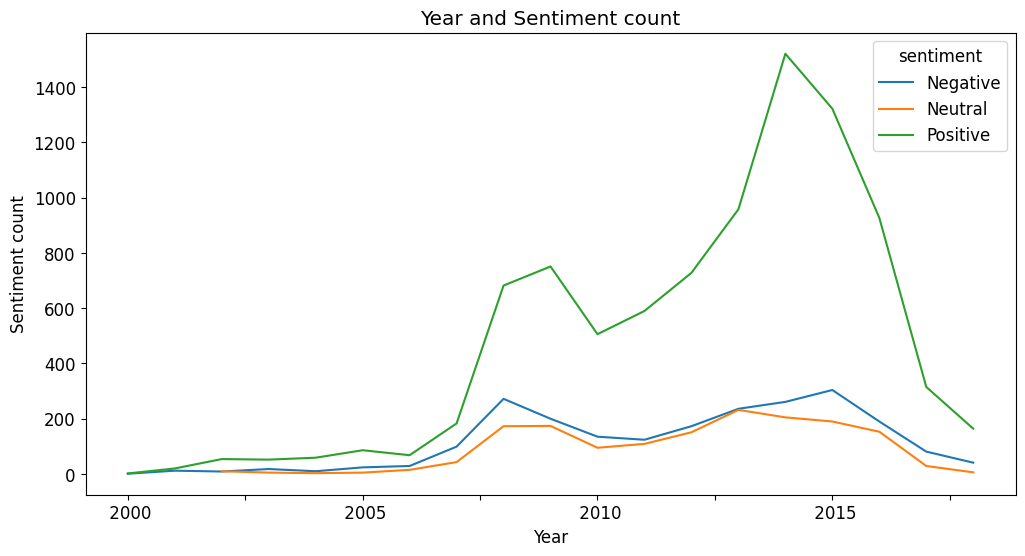

In [19]:
#plot layout
plt.rcParams.update({'font.size': 12})
rcParams['figure.figsize'] = 12,6

process_reviews.groupby(['year','sentiment'])['sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

**Insights:** <br>
**From the plot we can clearly see the rise in positive reviews from 2010. Reaching its peak around 2013 and there is a dip in 2014, All the review rates were dropped at this time. Negative and neutral reviews are very low as compared to the positive reviews. Our First assumption is wrong !**

## Day of month vs Reviews count
**Let's check if there are any relationship between reviews and day of month**

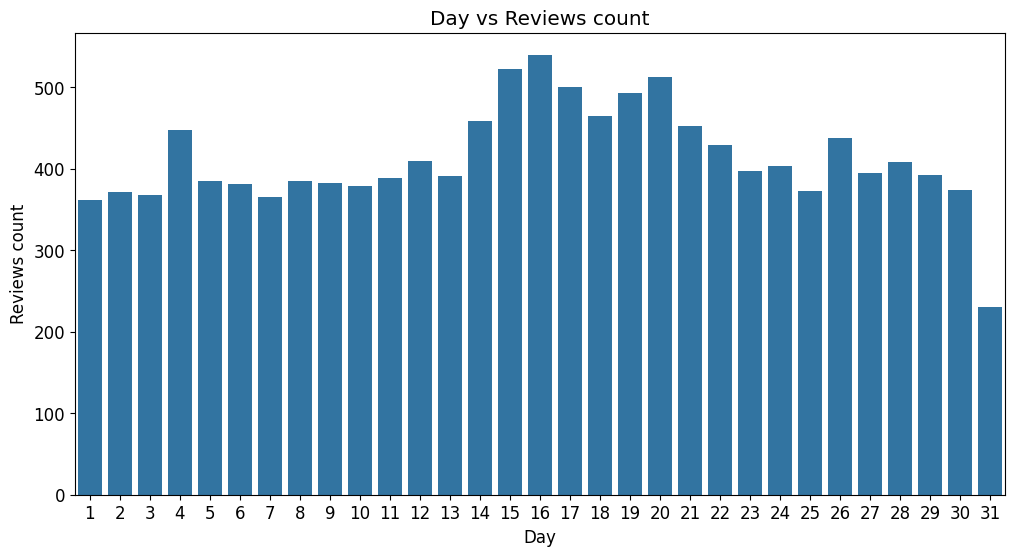

In [20]:
#Creating a dataframe
day=pd.DataFrame(process_reviews.groupby('day')['reviews'].count()).reset_index()
day['day']=day['day'].astype('int64')
day.sort_values(by=['day'])

#Plotting the graph
sns.barplot(x="day", y="reviews", data=day)
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()

**Insights:** <br>
The review count peaks around the middle of the month, with the highest activity on the 15th and 16th. The start of the month shows steady engagement, while the count drops significantly towards the end, especially on the 31st. This pattern suggests users are more active in leaving reviews mid-month. Our second assumption is wrong ! Never trust your instincts unles you do EDA.

## Creating few more features for text analysis
Now, let's create polarity, review length and word count

Polarity: We use Textblob for for figuring out the rate of sentiment . It is between [-1,1] where -1 is negative and 1 is positive polarity

Review length: length of the review which includes each letters and spaces

Word length: This measures how many words are there in review

In [21]:
process_reviews['polarity'] = process_reviews['reviews'].map(lambda text: TextBlob(text).sentiment.polarity)
process_reviews['review_len'] = process_reviews['reviews'].astype(str).apply(len)
process_reviews['word_count'] = process_reviews['reviews'].apply(lambda x: len(str(x).split()))

In [22]:
process_reviews.head()

overall  verified      reviewerID        asin  \
0      4.0     False  A38NELQT98S4H8  0321719816   
1      4.0     False  A3QJU4FEN8PQSZ  0321719816   
2      5.0     False   ACJT8MUC0LRF0  0321719816   
3      5.0     False   AYUF7YETYOLNX  0321719816   
4      5.0     False  A31ICLWQ9CSHRS  0321719816   

                                             reviews sentiment   year month  \
0  ive using dreamweaver predecessor macromedias ...  Positive   2010    10   
1  demo done pc version references mac version ne...  Positive   2010    10   
2  if youve wanting learn create website but eith...  Positive   2010    10   
3  ive creating websites dreamweaver years experi...  Positive   2010    10   
4  decided trying number products switch gold sta...  Positive   2010    10   

  day  polarity  review_len  word_count  
0  20  0.239333         847         116  
1  18  0.082980        1581         233  
2  16  0.163109        5701         822  
3  12  0.232525        1659         232  
4   7  0.279870         753         108

In [23]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

## Sentiment polarity distribution
**Let's look at our polarity distribution**

In [24]:
process_reviews['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

**Insights:**
* **We have a lot of positive polarities compared to the negative polarities**
* **This polarity distributions assures the number of positive reviews we had**
* **We can say that this polarity is a normally distributed but not standard normal since there are irregularities near the positive middle.**


## Review Rating Distribution
**Let's check out how overall ratings are distributed**

In [25]:
process_reviews['overall'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Review Rating Distribution')

We have a large number of 5 ratings(nearly 6k) followed by 4,3,1,2. It's non linear in nature because of more ratings of 1 then 2

## Review Text Length Distribution
**Let's check out the length of review text**

In [26]:
process_reviews['review_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

* We have a right skewed distribution where most of the lengths falls between 0-5000

* The reason for such long review length distribution lies in the product category we are reviewing which is 'software' and thus has more detailed customer reviews then the general product's review length.

## Review Text Word Count Distribution
**Let's check out the word count of review text**

In [27]:
process_reviews['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Review Text Word Count Distribution')

We have a right skewed distribution with most of the words falling between 0-500 in a a review

## N-gram analysis
**Welcome to the deep text analysis. Here we will be using ngrams to analyse the text, based on it's sentiment **

## Monogram analysis
**Here we will plot most frequent **one word in reviews** based on sentiments**

In [28]:
#Filtering data
review_pos = process_reviews[process_reviews["sentiment"]=='Positive'].dropna()
review_neu = process_reviews[process_reviews["sentiment"]=='Neutral'].dropna()
review_neg = process_reviews[process_reviews["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

**As we see, the words doen't match with the sentiment except few. Through monogram we can't judge a sendiment based on one word. So let's try with frequent two words**

## Bigram analysis
**Here we will plot most frequent two words in reviews based on sentiments**

In [29]:
## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["reviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["reviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["reviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'brown')



# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,horizontal_spacing=0.25,
                          subplot_titles=["Bigram plots of Positive reviews", 
                                          "Bigram plots of Neutral reviews",
                                          "Bigram plots of Negative reviews"
                                          ])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)


fig['layout'].update(height=1000, width=800, paper_bgcolor='rgb(233,233,233)', title="Bigram Plots")
iplot(fig, filename='word-plots')

**Here we can get a clear idea about the sentiments from the bi-words. lets move tp trigram to get most frequent 3 words**

## Trigram analysis
**Here we will plot most frequent three words in reviews based on sentiments**

In [30]:
## Get the bar chart from positive reviews ##
for sent in review_pos["reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')




# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04, horizontal_spacing=0.05,
                          subplot_titles=["Tri-gram plots of Positive reviews", 
                                          "Tri-gram plots of Neutral reviews",
                                          "Tri-gram plots of Negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
iplot(fig, filename='word-plots')


**As we can clearly see the with trigram analysis that 3 words clearly demonstrate sentiments of the customers with sentencein all three categories of the rating.  We have completed our text ngram analysis. Let's look at wordcloud **

## Wordcloud-Positive reviews

**Let's look at the word cloud of positive reviews**

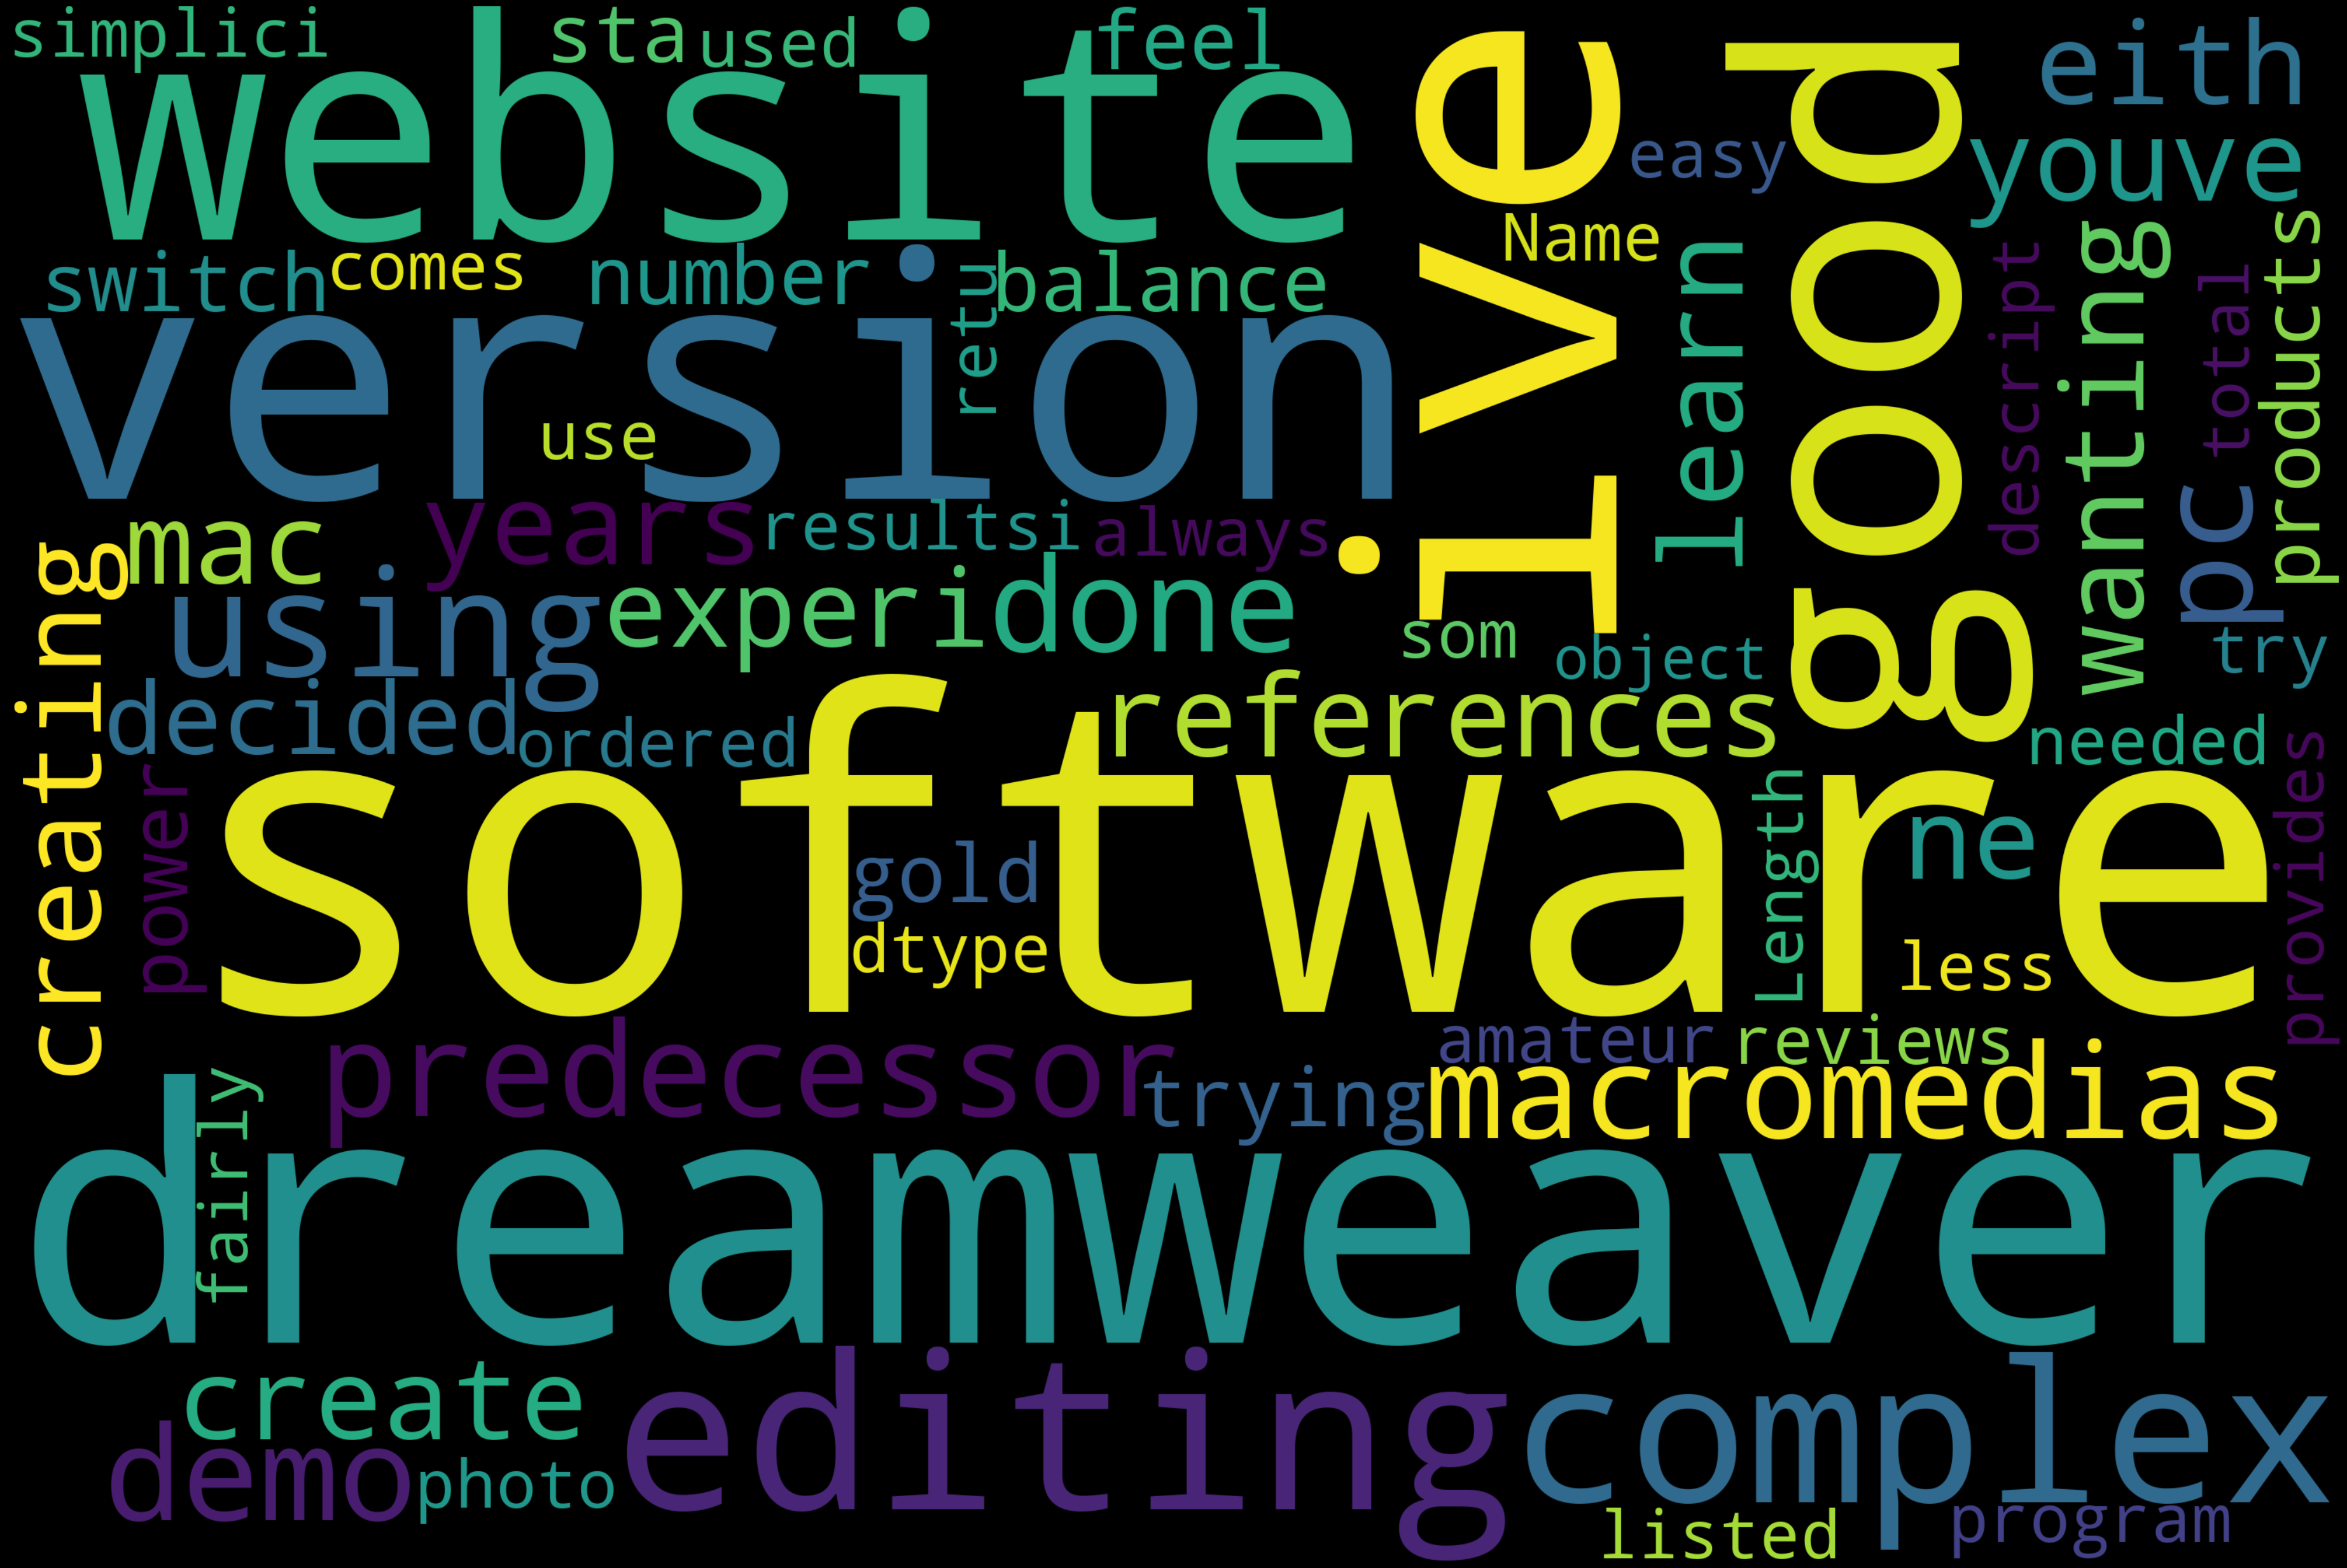

In [31]:
text = review_pos["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**We can see positive words like good, power, simple, easy, provides, fairly etc.,**

## Wordcloud-Neutral reviews

**Let's look at the word cloud of neutral reviews**

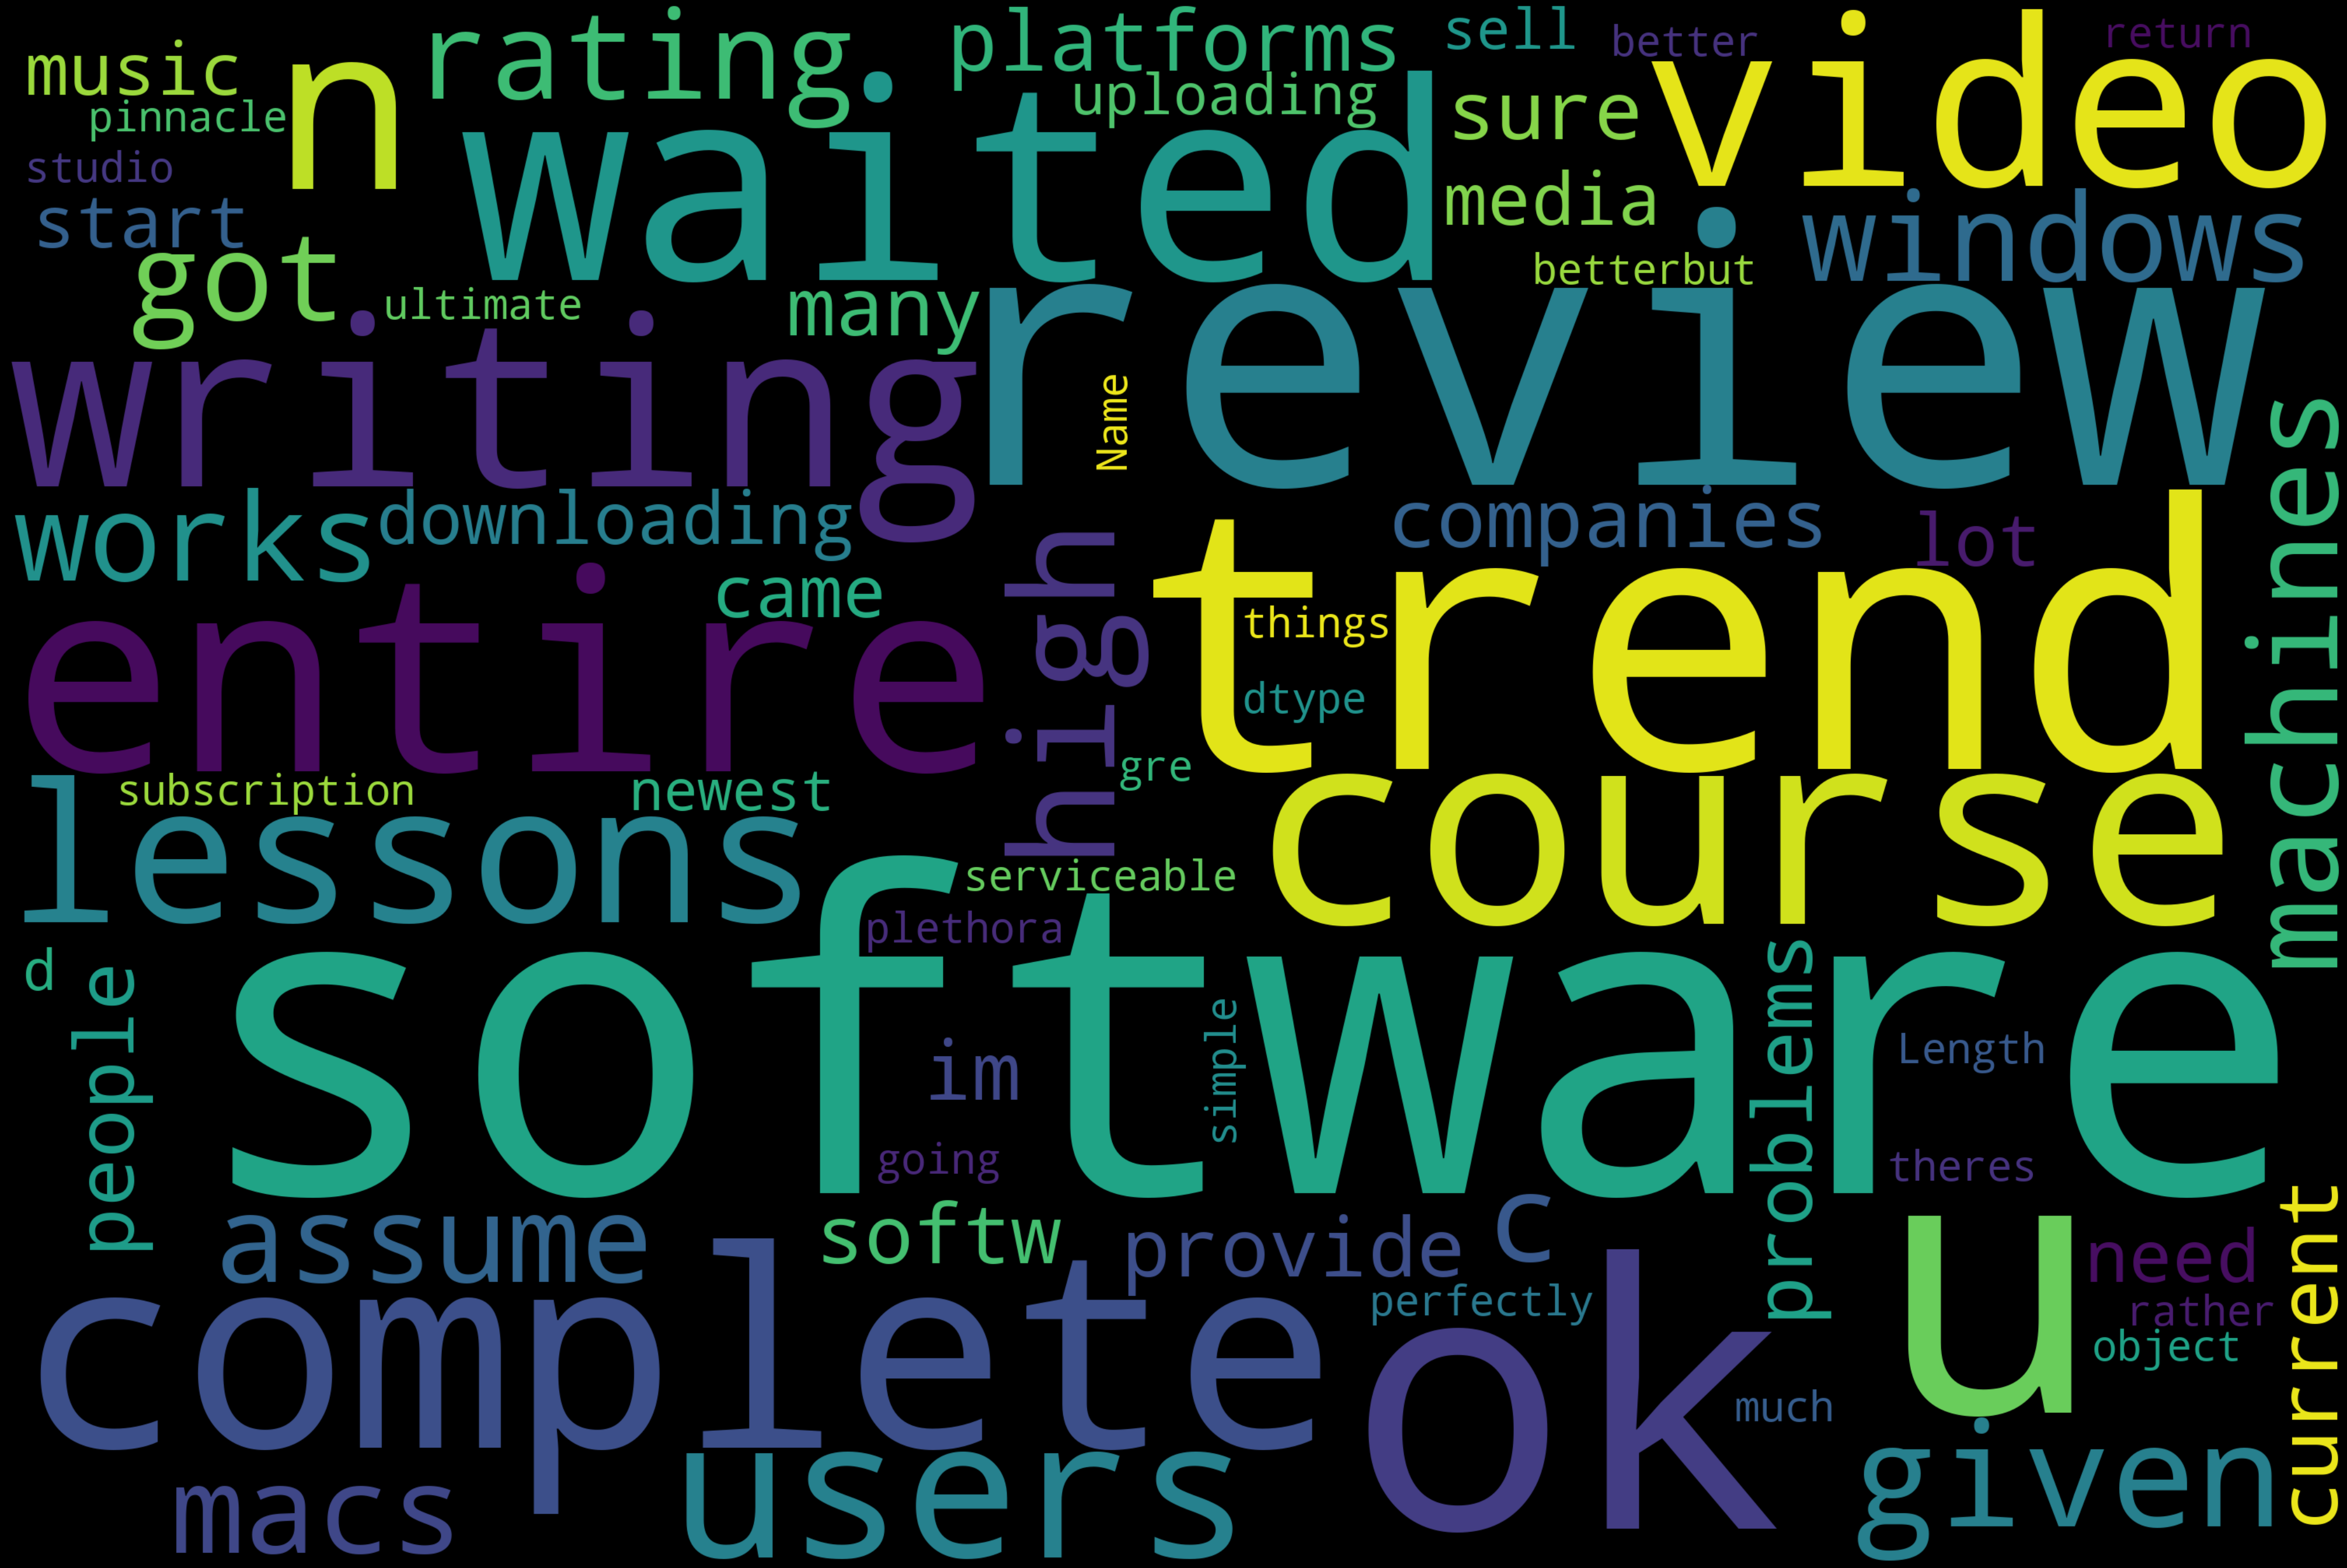

In [32]:
text = review_neu["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Most of the neutral review words are focussed on the products and how can they be improved.**

## Wordcloud-Negative reviews

**Let's look at the word cloud of negative reviews**

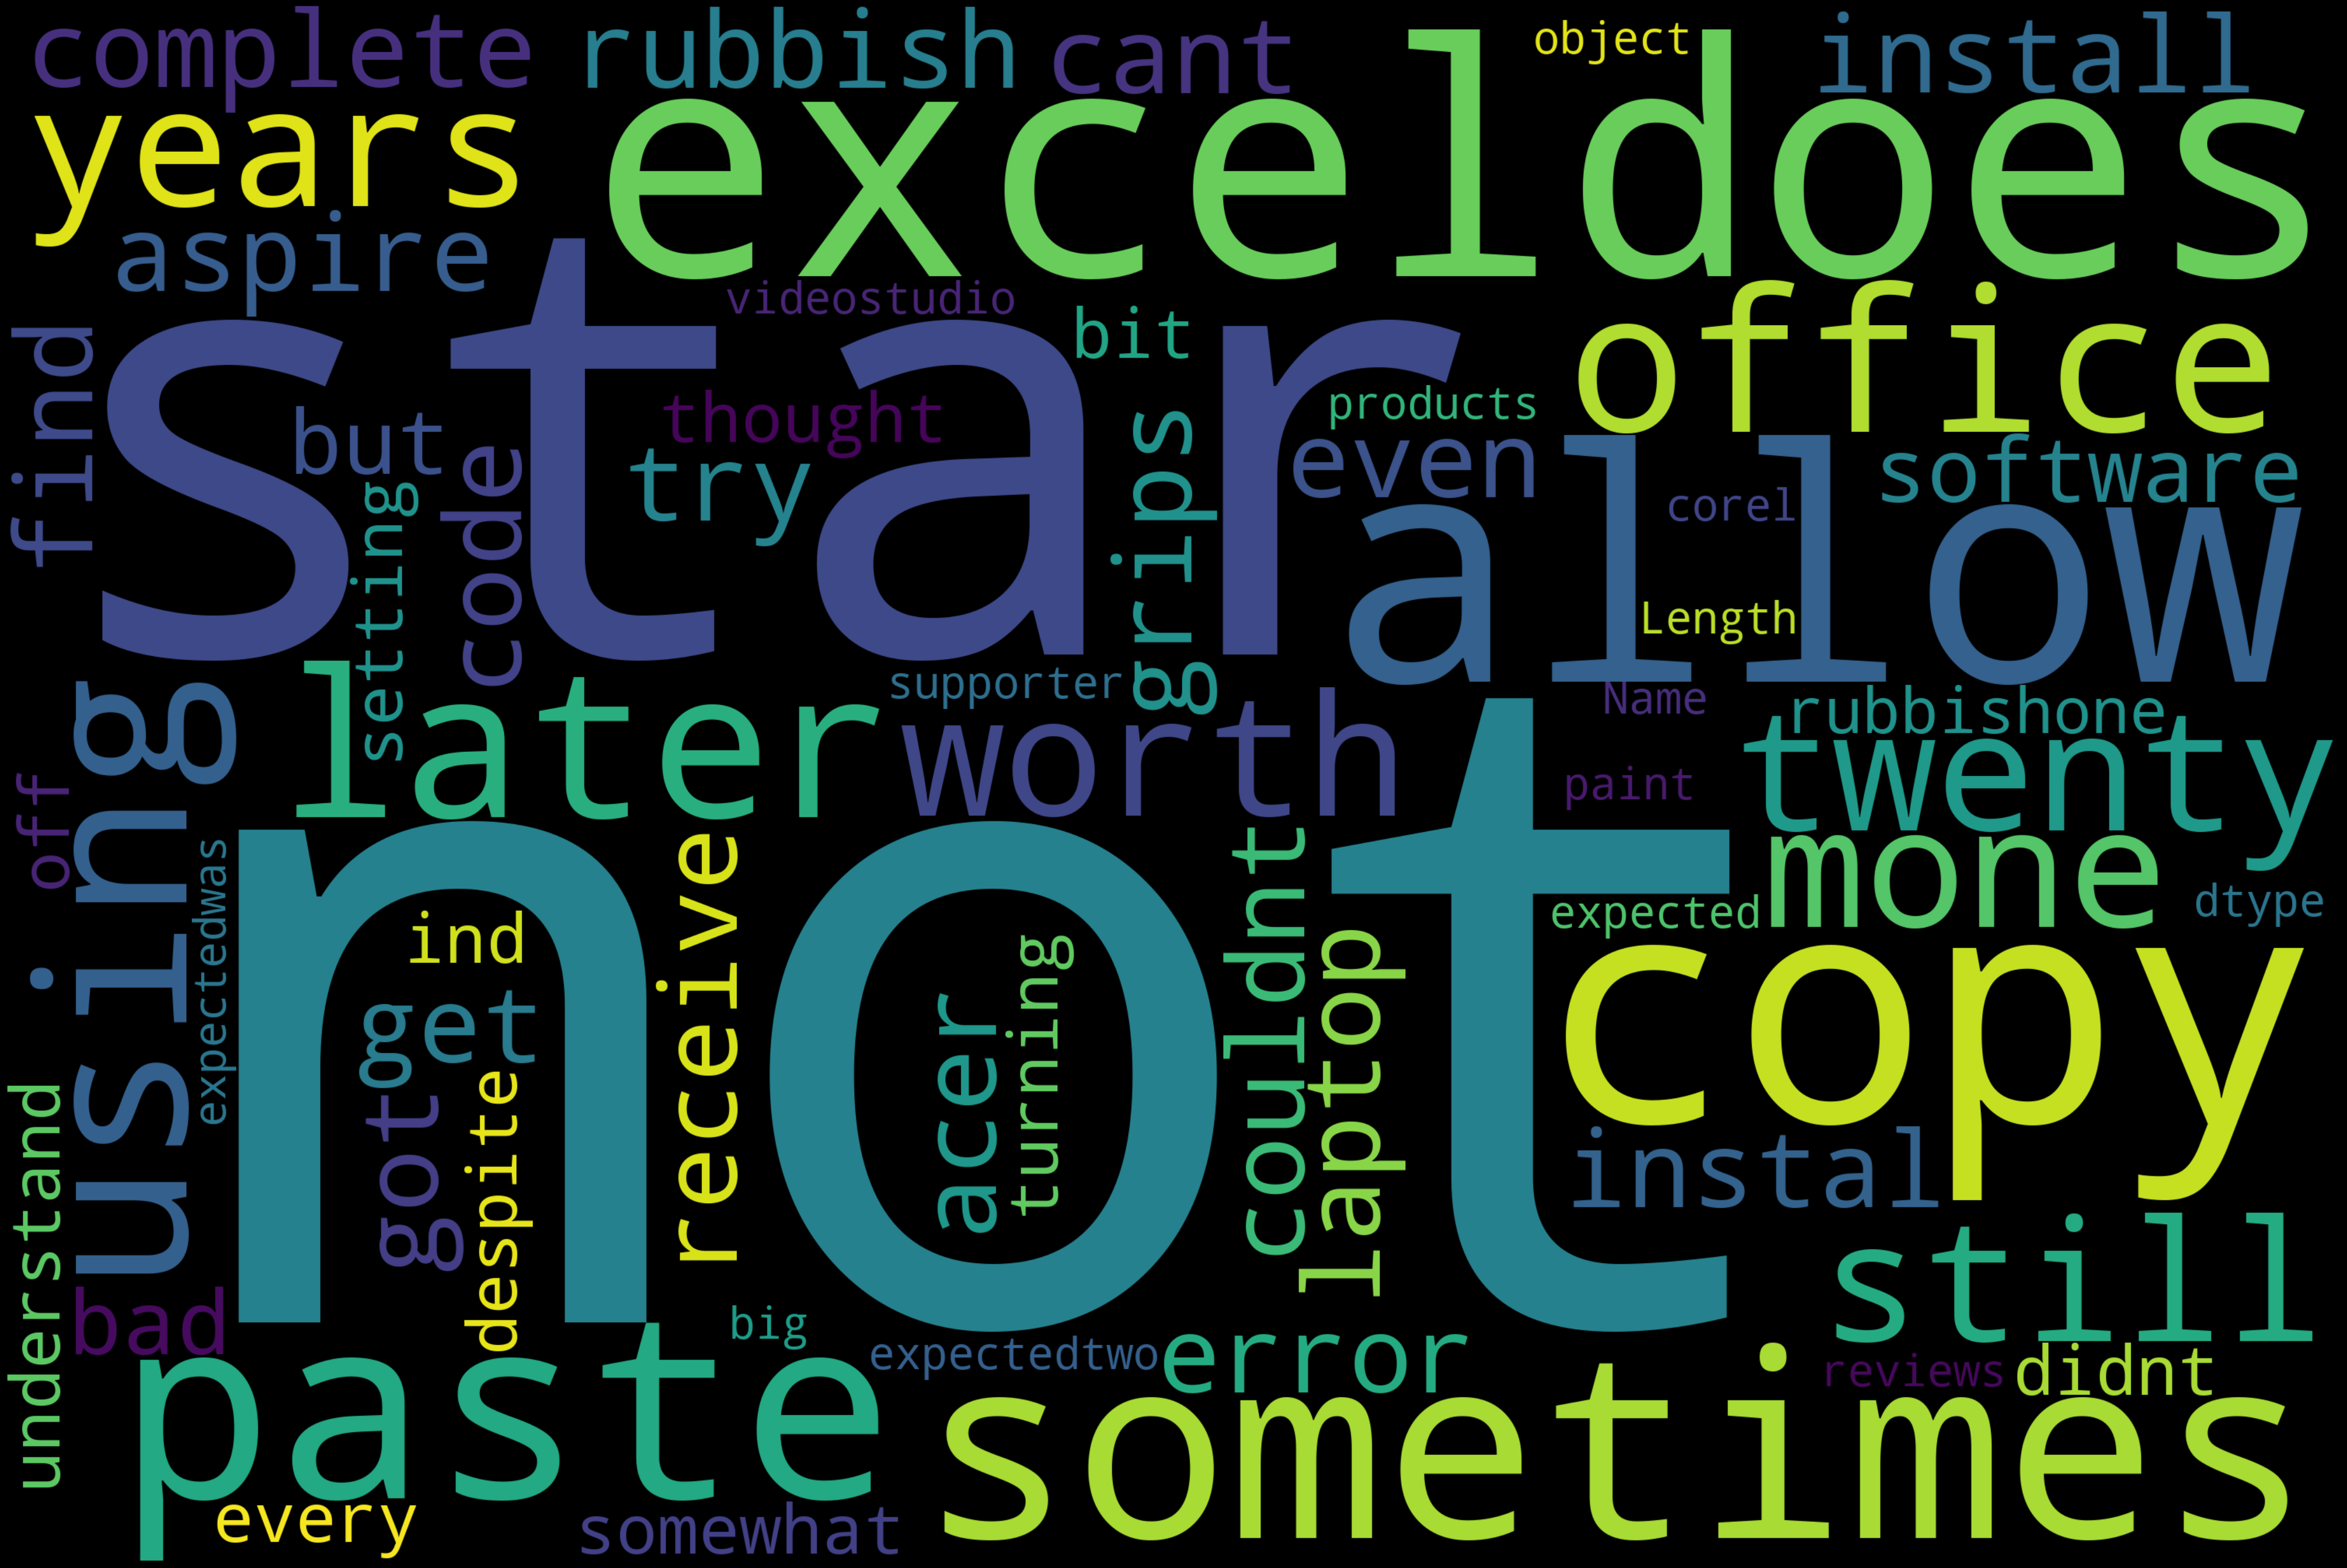

In [33]:
text = review_neg["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**We can see negative review words such as bad, rubbish, couldnt, cant, off, somewhat, error, despite etc.,**

<a id="section-four"></a>
# Extracting Features from Cleaned reviews
**Before we build the model for our sentiment analysis, it is required to convert the review texts into vector formation as computer cannot understand words and their sentiment. In this project, we are going to use TF-TDF method to convert the texts**

## Encoding target variable-sentiment
**Let's encode our target variable with Label encoder.**

In [34]:
# calling the label encoder function
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'sentiment'. 
process_reviews['sentiment']= label_encoder.fit_transform(process_reviews['sentiment']) 
  
process_reviews['sentiment'].unique() 

array([2, 1, 0])

In [35]:
process_reviews['sentiment'].value_counts()

sentiment
2    8988
0    2219
1    1598
Name: count, dtype: int64

## Stemming the reviews
**Stemming is a method of deriving root word from the inflected word. Here we extract the reviews and convert the words in reviews to its root word. for example,**
* **Going->go**
* **Finally->fina**

**If you notice, the root words doesn't need to carry a semantic meaning. There is another technique knows as Lemmatization where it converts the words into root words which has a semantic meaning. Simce it takes time. I'm using stemming**

In [36]:
#Extracting 'reviews' for processing
review_features=process_reviews.copy()
review_features=review_features[['reviews']].reset_index(drop=True)
review_features.head()

reviews
0  ive using dreamweaver predecessor macromedias ...
1  demo done pc version references mac version ne...
2  if youve wanting learn create website but eith...
3  ive creating websites dreamweaver years experi...
4  decided trying number products switch gold sta...

In [37]:
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(review_features)):
    review = re.sub('[^a-zA-Z]', ' ', review_features['reviews'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)    

In [38]:
corpus[3]

'ive creat websit dreamweav year experi taught one thing im hack web design recent tri learn industri css standard heard dreamweav made great advanc css manag im embarrass say version usingwhen got chanc get review copi train set jump two reason first mull spend money upgrad dw second alway miss lot dw capabl obviou upgrad css manag upgrad alonea valu train couldnt happier not advanc tip trick resourc nor exhaust boot camp web page author but fairli thorough train take site plan design creation publish watch video begin end start pretti basic html refresh move meatier dw specif train see return sever section later brush upperson css media form train video enough justifi price tag train lesson short easili digest like broke train minut time littl indepth googl subject like text wrap absolut posit css object wont check version dw adob certif train aid start low level introduct goe entir dw web creation process wonder design interfac great overview use dwwhat isnt substitut spend time wor

**This is how a line looks like now, as computer cannot understand words and their sentiment we need to convert these words into 1's and 0's. To encode it we use TFIDF**

## TFIDF(Term Frequency — Inverse Document Frequency)
**TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.**

**Here we are splitting as bigram (two words) and consider their combined weight.Also we are taking only the top 5000 words from the reviews.**

In [39]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(review_features['reviews'])

In [40]:
X.shape

(12805, 5000)

**As we have considered 5000 words, we can confirm that we have 5000 columns from the shape.**

In [41]:
#Getting the target variable(encoded)
y=process_reviews['sentiment']

## Handling Imbalance target feature-SMOTE (Oversampling)
**In our target feature, we noticed that we got a lot of positive sentiments compared to negative and neutral. So it is crucial to balanced the classes in such situatio. Here I use SMOTE(Synthetic Minority Oversampling Technique) to balance out the imbalanced dataset problem.It aims to balance class distribution by randomly increasing minority class examples by replicating them.** <br>

**SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.**

In [42]:
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({2: 8988, 0: 2219, 1: 1598})
Resampled dataset shape Counter({2: 8988, 1: 8988, 0: 8988})


Great, as you can see the resampled data has equally distributed classes

## Train-test split(75:25)
**Using train test split function we are splitting the dataset into 75:25 ratio for train and test set respectively.**

In [43]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

<a id="section-five"></a>
# Model Building: Sentiment Analysis
**As we have successfully processed the text data, not it is just a normal machine learning problem. Where from the sparse matrix we predict the classes in target feature.**

In [44]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Model selection

**First select the best peforming model by using cross validaton. Let's consider all the classification algorithm and perform the model selection process**

In [45]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.764384575039032
Decision Tree Test Accuracy: 0.708147199453552
KNN Test Accuracy: 0.6836377219945355
SVC Test Accuracy: 0.7728148175253708
Naive Bayes Test Accuracy: 0.6904328893442624


**From the results, we can see Support Vector Classification(SVC) outdone the rest of the algorithms with the accuracies from the results are more than 75%. That's great. So let's go with Support Vector Classsification with hyperparameter tuning.**

## Support Vector Classsification(SVC) with Hyperparameter tuning
**We use regularization parameter, Kernel and gamma for parameter tuning. let's see which one to plug.**

In [ ]:
param_dist = {
    'C': np.logspace(-2, 2, 10),  
    'kernel': ['linear', 'rbf'],  
    'gamma': ['scale', 'auto']    
}

clf = RandomizedSearchCV(SVC(random_state=0), param_distributions=param_dist, n_iter=50, cv=3, verbose=0, n_jobs=-1)

best_model = clf.fit(X_train, y_train)

print(best_model.best_estimator_)
print("The mean accuracy of the model is:", best_model.score(X_test, y_test))


# Note: this cell will take longer time to execute as it is creating the best model for our classification. 

SVC(C=12.915496650148826, random_state=0)
The mean accuracy of the model is: 0.9055036344755971


**From the selected params, we get accuracy. Let's plug and chug**

In [ ]:
svc = SVC(C=12.915496650148826, kernel='linear', random_state=0)

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('Accuracy of SVC classifier on test set: {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy of SVC classifier on test set: 0.81


**We have got 81% accuracy. That ain't bad. But for classification problems we need to get confusion matrix and check f1 score rather than accuracy**

## Classification metrics
**Here we plot the confusion matrix with ROC and check our f1 score**

Confusion matrix, without normalization


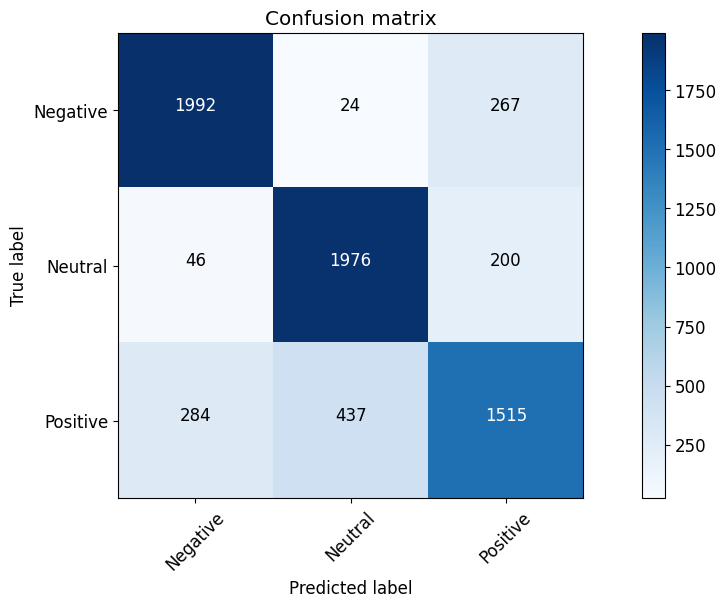

In [55]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Negative','Neutral','Positive'])

**Check out the diagonal elements(1992+1976+1515), they are correctly predicted records and rest are incorrectly classified by the algorithm**

In [56]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87      2283
           1       0.81      0.89      0.85      2222
           2       0.76      0.68      0.72      2236

    accuracy                           0.81      6741
   macro avg       0.81      0.81      0.81      6741
weighted avg       0.81      0.81      0.81      6741



**Since predicting both positive,negative and neutral reviews are important we are considering We got a pretty good f1 score. As we see it got a good score across most classes classified except class 2 where we got comparatively lesser score of 0.72**

# Conclusion
**We have done a pretty neat job on classifying all the classes starting from splitting the sentiments based on overall score,text cleaning, customize the stopwords list based on requirement and finally handling imbalance with smote. Here are few insights from the notebook.**

* **Consider welcoming ngram in sentiment analysis as one word can't give is proper results and stop words got to be manually checked as they have negative words. It is advised to avoid using stop words in sentiment analysis**
* **Most of our neutral reviews were actual critic of product from the buyers, so amazon can consider these as feedback and give them to the seller to help them improve their products**
* **Most of the reviews in this dataset were about software such as Dreamviewer.**
* **Balancing the dataset got me a very fruitful accuracy score. Without balancing, I got good precision but very bad recall and inturn affected my f1 score. So balancing the target feature is important**
* **In sentiment analysis, we should concentrate on our f1 score where we got an average of 81% so we did a pretty good job.**


**Thank you for reading my notebook.

## Acknowledgements:
1. [https://www.kaggle.com/ratan123/sentiment-extraction-understanding-metric-eda](https://www.kaggle.com/ratan123/sentiment-extraction-understanding-metric-eda)
2. [https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)
3. [https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a](https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a)